In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [2]:
reference = np.loadtxt('Day 1/Tube/He with calibration.txt', dtype=np.str, skiprows=14)
reference = np.char.replace(reference, ',', '.').astype(np.float64)

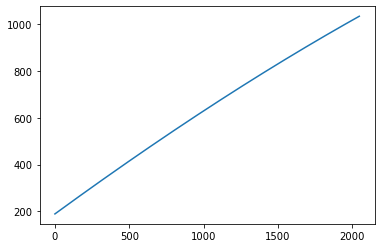

In [3]:
plt.plot(reference[:,0])

In [44]:
heights = {
    'H2' : 0.2,
    'Ar' : 0.4,
    'He' : 0.2,
    'Ne' : 0.6,
    'Hg' : 0.5
}
spectral_lines = {
    'H2' : [486, 656],
    'Ar' : [349, 358, 751, 772, 811],
    'He' : [388, 447, 501, 587, 667, 706],
    'Ne' : [640],
    'Hg' : [365, 435, 546]
}
relative_intensity = {
    'He' : np.array([500, 200, 100, 500, 100, 200])
}
for i in relative_intensity.keys():
    relative_intensity[i] = relative_intensity[i]/np.max(relative_intensity[i])

In [45]:
tube = 'Ar'
data = np.loadtxt('Day 1/Tube/'+tube+'.txt', dtype=np.str, skiprows=14)
data = np.char.replace(data, ',', '.').astype(np.float64)
data_bkg = np.loadtxt('Day 1/Tube/Background - '+tube+'.txt', dtype=np.str, skiprows=14)
data_bkg = np.char.replace(data_bkg, ',', '.').astype(np.float64)
data[:,1] = data[:,1]-data_bkg[:,1]
data[:,1] /= np.max(data[:,1])

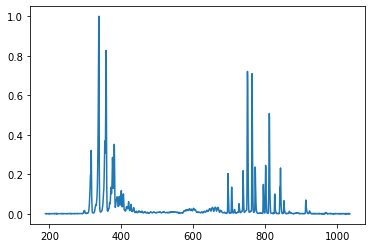

In [46]:
plt.plot(reference[:,0], data[:,1])

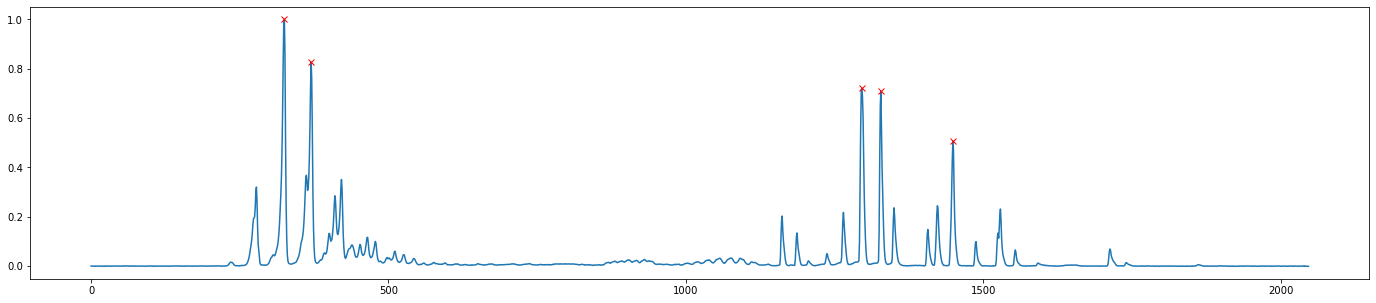

In [48]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(24, 5)
peaks = find_peaks(data[:,1], height=heights[tube])[0]
ax.plot(data[:,0], data[:,1])
ax.plot(data[peaks,0], data[peaks,1], 'rx')


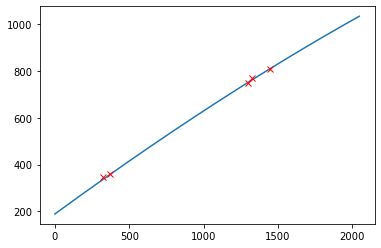

In [49]:
plt.plot(reference[:,0])
plt.plot(peaks, spectral_lines[tube], 'rx')

In [36]:
tubes = ['H2', 'He', 'Ne', 'Hg', 'Ar']
pixels = np.array([])
wavelengths = np.array([])
for t in tubes:
    data = np.loadtxt('Day 1/Tube/'+t+'.txt', dtype=np.str, skiprows=14)
    data = np.char.replace(data, ',', '.').astype(np.float64)
    data_bkg = np.loadtxt('Day 1/Tube/Background - '+t+'.txt', dtype=np.str, skiprows=14)
    data_bkg = np.char.replace(data_bkg, ',', '.').astype(np.float64)
    data[:,1] = data[:,1]-data_bkg[:,1]
    data[:,1] /= np.max(data[:,1])
    peaks = find_peaks(data[:,1], height=heights[t])[0]
    pixels = np.append(pixels, peaks)
    wavelengths = np.append(wavelengths, spectral_lines[t])

In [51]:
def cal(x, *params):
    A,B,C = params
    return A + B*x + C*x*x

In [55]:
popt, pcov = curve_fit(cal, pixels, wavelengths, p0=(200, 1, 0), sigma=np.ones(np.shape(wavelengths)), absolute_sigma=True)

In [66]:
popt, pcov

(array([ 1.86673289e+02,  4.69066965e-01, -2.64334090e-05]),
 array([[ 9.66702582e+00, -2.60855003e-02,  1.59377306e-05],
        [-2.60855003e-02,  7.27165468e-05, -4.53582361e-08],
        [ 1.59377306e-05, -4.53582361e-08,  2.87851518e-11]]))

(160.0, 900.0)

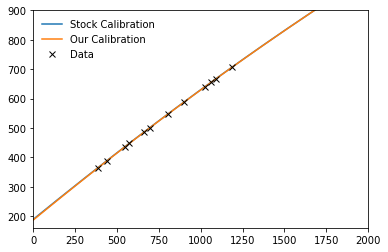

In [64]:
fig, ax = plt.subplots(1,1)


ax.plot(reference[:,0], label='Stock Calibration')

xs = np.linspace(0, 2000)
ax.plot(xs, cal(xs, *popt), label='Our Calibration')

ax.plot(pixels, wavelengths, 'kx', label='Data')

ax.legend(frameon=False)
ax.set_xlim((0, 2000))
ax.set_ylim((160, 900))

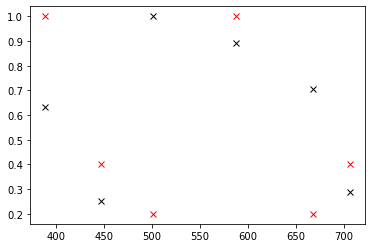

In [90]:
hs = data[peaks, 1]
plt.plot(reference[peaks,0], relative_intensity[tube], 'rx')
plt.plot(reference[peaks,0], hs, 'kx')